In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
plt.style.use("ggplot")
pd.set_option('display.max_columns',200)

In [2]:
data=pd.read_csv("coaster_db.csv")
df=pd.DataFrame(data)


In [3]:
df.shape

(1087, 56)

In [4]:
df.head(10)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,40 ft (12 m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,41 ft (12 m),NaN,NaN,NaN,NaN,NaN,1:00,NaN,NaN,Edward Joy Morris,25°,9 ft (2.7 m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,Wood,1902-01-01,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1904,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,60 ft (18 m),NaN,NaN,NaN,NaN,NaN,1 minute 30 seconds,NaN,NaN,"Christopher Feucht, Welcome Mosley",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,40.5744,-73.9786,Other,1907-06-06,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,41.58

In [5]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [7]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [8]:
df.describe(include="all")

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
count,1087,953,937,1087,874,837,1087,1028,831,744,965,932.000000,795,382,718,487,765,575,362,578,357,494,96,69,173,335,19,96,236,27,88,87,50,106,44,81,22,46,60,24,35,1087.000000,812.000000,812.000000,1087,837,937,935,937.000000,937,937.000000,965.000000,965,171.000000,1087.000000,362.000000
unique,990,569,243,280,15,656,98,102,100,317,382,NaN,116,272,221,271,208,160,70,153,83,235,84,1,140,95,1,84,144,16,67,16,1,1,33,1,6,1,50,12,18,NaN,NaN,NaN,3,602,225,229,NaN,2,NaN,NaN,2,NaN,NaN,NaN
top,Batman: The Ride,935 ft (285 m),50 mph (80 km/h),Other,Operating,1976,Steel,Vekoma,48 in (122 cm),Custom,70 ft (21 m),NaN,Chain lift hill,$10 million,2 trains with 6 cars. Riders are arranged 2 ac...,Planet Snoopy,1:30,1200 riders per hour,4,Werner Stengel,90°,100 ft (30 m),"April 29, 2005",Fast Lane available,Mine Train Through Nature's Wonderland,Twister,Fastrack available,"April 29, 2005","September 16, 2007",1895,The Joker,Official website,Flash Pass Available,Must transfer from wheelchair,Toy Story,Single rider line available,Over-the-shoulder,Flash Pass available,0 to 40 mph (0 to 64 km/h) in 3 seconds,Single Lap Bar,Das große LEGO-Rennen,NaN,NaN,NaN,Steel,1999-01-01,50 mph,80 km/h,NaN,mph,NaN,NaN,ft,NaN,NaN,NaN
freq,7,21,63,250,668,7,308,135,224,20,20,NaN,411,6,52,14,59,36,46,172,45,15,4,69,6,43,19,4,8,7,4,64,50,106,4,81,17,46,4,6,4,NaN,NaN,NaN,816,10,63,63,NaN,780,NaN,NaN,794,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.547210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.986201,38.373484,-41.595373,NaN,NaN,NaN,NaN,53.850374,NaN,48.617289,89.575171,NaN,101.996491,1.326587,3.824006
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.114073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.475248,15.516596,72.285227,NaN,NaN,NaN,NaN,23.385518,NaN,16.678031,136.246444,NaN,67.329092,2.030854,0.989998
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884.000000,-48.261700,-123.035700,NaN,NaN,NaN,NaN,5.000000,NaN,5.000000,4.000000,NaN,13.100000,0.000000,0.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989.000000,35.031050,-84.552200,NaN,NaN,NaN,NaN,40.000000,NaN,37.300000,44.000000,NaN,51.800000,0.000000,3.400000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,40.289800,-76.653600,NaN,NaN,NaN,NaN,50.000000,NaN,49.700000,79.000000,NaN,91.200000,0.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,44.799600,2.778100,NaN,NaN,NaN,NaN,63.000000,NaN,58.000000,113.000000,NaN,131.200000,2.000000,4.500000


In [9]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [10]:
df[['coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
    # 'Type',
    'Manufacturer', 
    # 'Height restriction', 'Model', 'Height',
    #    'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #    'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #    'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #    'Track layout', 'Fastrack available', 'Soft opening date.1',
    #    'Closing date',
    # 'Opened',
    # 'Replaced by', 'Website',
       # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       # 'Single rider line available', 'Restraint Style',
       # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
    'latitude', 'longitude', 'Type_Main', 'opening_date_clean',
    # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    # 'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']]

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [11]:
#Another way to get rid of extra columns or we can say useless columns
df.drop(['Opening date'],axis=1)

,coaster_name,Length,Speed,Location,Status,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 ac...,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 ac...,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,Tron,Single rider line available,NaN,NaN,NaN,NaN,TRON Lightcycle / Run,2022,NaN,NaN,Steel,2016-06-16,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4

In [12]:
df=df[['coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
    # 'Type',
    'Manufacturer', 
    # 'Height restriction', 'Model', 'Height',
    #    'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #    'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #    'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #    'Track layout', 'Fastrack available', 'Soft opening date.1',
    #    'Closing date',
    # 'Opened',
    # 'Replaced by', 'Website',
       # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       # 'Single rider line available', 'Restraint Style',
       # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
    'latitude', 'longitude', 'Type_Main', 'opening_date_clean',
    # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    # 'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy() #So that python know that this is a brand new dataset and not the referance of the old dataset

In [13]:
df.shape

(1087, 13)

In [14]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [15]:
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean']) #This is to make sure that we covert the 'opening_date_clean' 
# to a datetime not a object
# pd.to_numaric(df["col_name"]) #to covert some column in to a numaric 

In [16]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [17]:
#Renaming the columns 
df=df.rename(columns={'coaster_name':'Coaster_Name',
                  'year_introduced':'Year_Introduced',
                  'latitude':'Latitude',
                  'longitude':'Longitude',
                  'opening_date_clean':'Opening_Date_Clean',
                  'speed_mph':'Speed_mph',
                  'height_ft':'Height_ft',
                  'Inversions_clean':'Inversions_Clean',
                  'Gforce_clean':'Gforce_Clean'})


In [18]:
df.isna().sum()

Coaster_Name            0
Location                0
Status                213
Manufacturer           59
Year_Introduced         0
Latitude              275
Longitude             275
Type_Main               0
Opening_Date_Clean    250
Speed_mph             150
Height_ft             916
Inversions_Clean        0
Gforce_Clean          725
dtype: int64

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [20]:
df.loc[df.duplicated()]#to see where are the duplicated values

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce_Clean


In [21]:
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce_Clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [22]:
#Checking for the duplicated value
df.loc[df.duplicated(subset=['Coaster_Name'])].head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce_Clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [23]:
df.query('Coaster_Name=="Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce_Clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [24]:
df.duplicated(subset=['Coaster_Name','Location','Opening_Date_Clean'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [25]:
df=df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date_Clean'])]\
.reset_index(drop=True).copy()

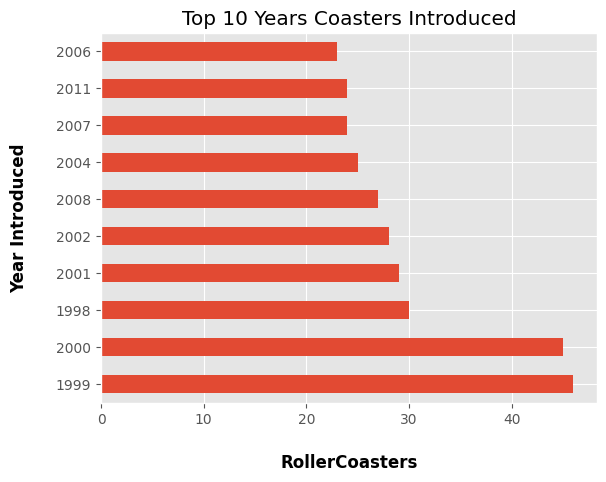

In [26]:
# ploating Features individually
# use value_counts() to see which year have how many rollercosters
ax=df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='barh',title="Top 10 Years Coasters Introduced")
ax.set_xlabel("RollerCoasters",labelpad=20,fontweight='bold',color='black')
ax.set_ylabel("Year Introduced",labelpad=20,fontweight='bold',color='black')
plt.show()


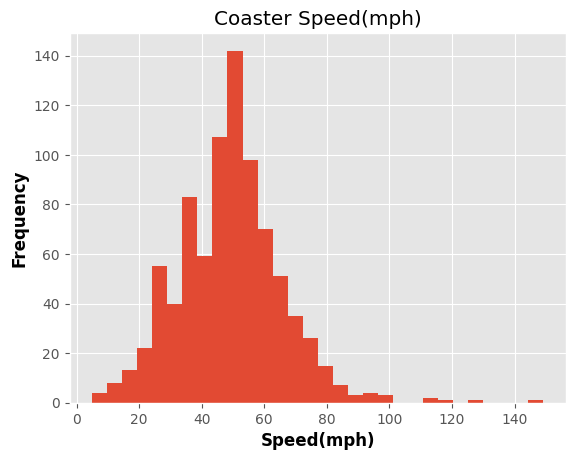

In [27]:
ax=df['Speed_mph'].plot(kind='hist',bins=30,title="Coaster Speed(mph)")
ax.set_xlabel("Speed(mph)",fontweight='bold',color='black')
ax.set_ylabel("Frequency",fontweight='bold',color='black')
plt.show()

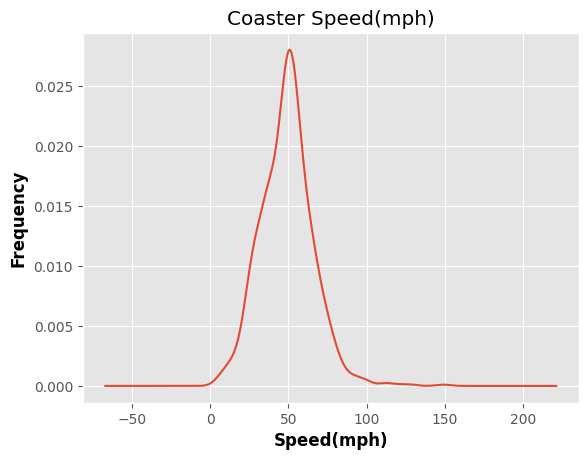

In [28]:
ax=df['Speed_mph'].plot(kind='kde',title="Coaster Speed(mph)")
ax.set_xlabel("Speed(mph)",fontweight='bold',color='black')
ax.set_ylabel("Frequency",fontweight='bold',color='black')
plt.show()

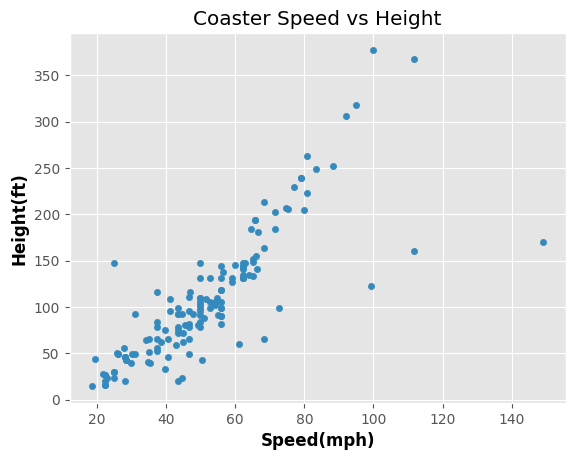

In [29]:
# ploating two Features
ax=df.plot(kind='scatter', x='Speed_mph', y='Height_ft',title="Coaster Speed vs Height")
ax.set_xlabel("Speed(mph)",fontweight='bold',color='black')
ax.set_ylabel("Height(ft)",fontweight='bold',color='black')
plt.show()

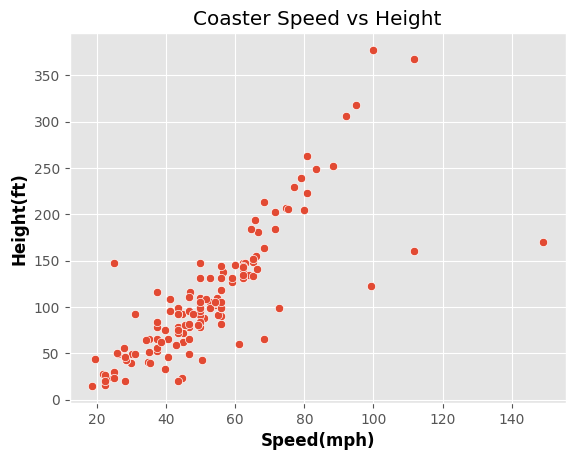

In [30]:
#USing Seaborn
sn=sns.scatterplot(x='Speed_mph', y='Height_ft',data=df)
sn.set_title("Coaster Speed vs Height")
sn.set_xlabel("Speed(mph)",fontweight='bold',color='black')
sn.set_ylabel("Height(ft)",fontweight='bold',color='black')
plt.show()

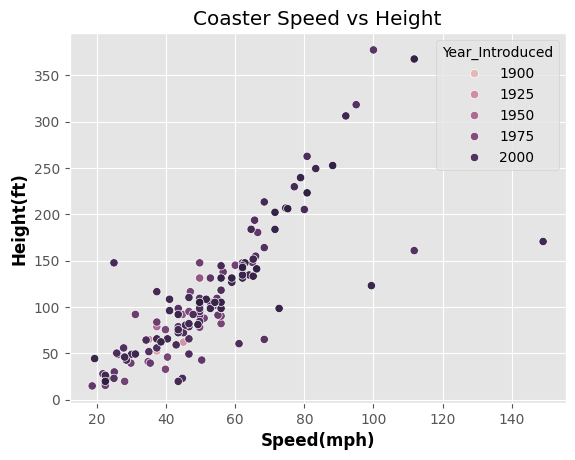

In [31]:
sn=sns.scatterplot(x='Speed_mph', y='Height_ft',hue="Year_Introduced",data=df)
sn.set_title("Coaster Speed vs Height")
sn.set_xlabel("Speed(mph)",fontweight='bold',color='black')
sn.set_ylabel("Height(ft)",fontweight='bold',color='black')
plt.show()

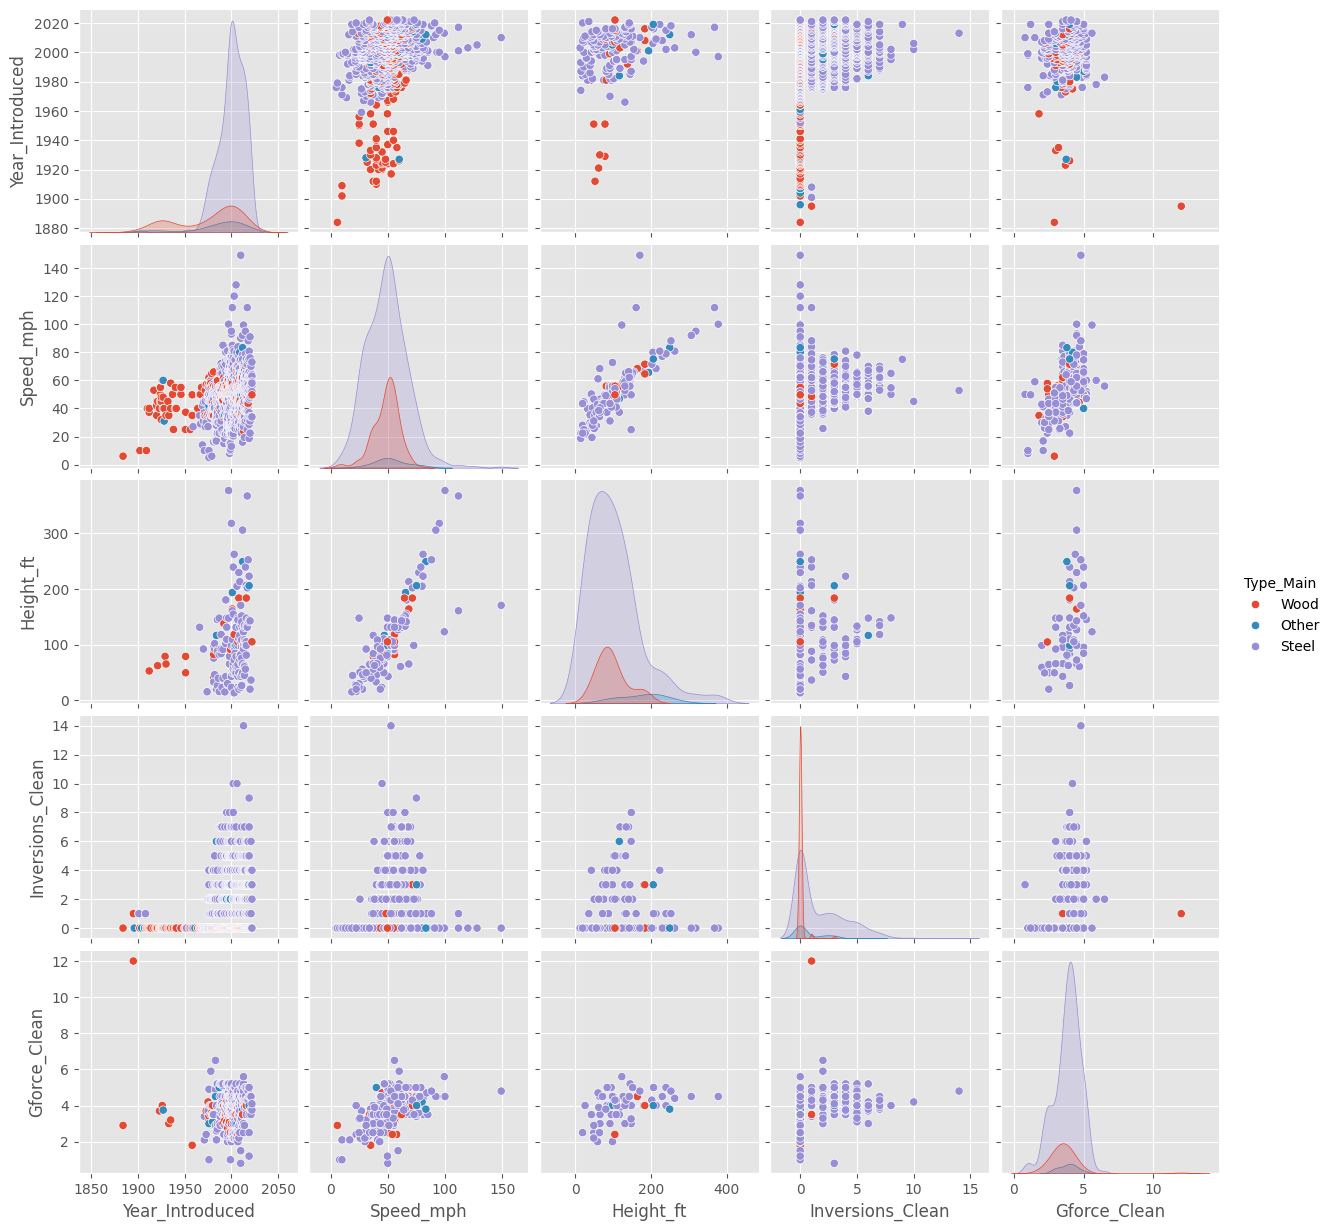

In [32]:
# ploating more then two Features
sns.pairplot(df,vars=['Year_Introduced','Speed_mph','Height_ft','Inversions_Clean','Gforce_Clean'],hue='Type_Main')
plt.show()

In [33]:
# Finding and seeing the correlation
df_corr=df[['Year_Introduced','Speed_mph','Height_ft','Inversions_Clean','Gforce_Clean']].corr()

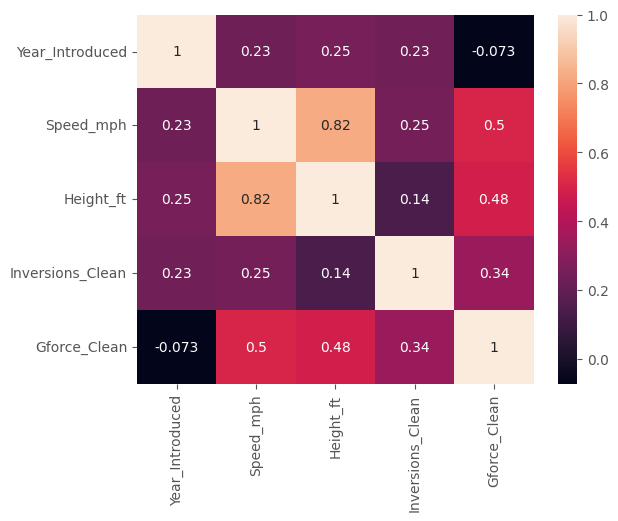

In [34]:
# Another intresting way to find and visualize the correlation
sns.heatmap(df_corr,annot=True)
plt.show()

In [35]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions_Clean,Gforce_Clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [36]:
df['Location'].value_counts()

Location
Other                       181
Kings Island                 19
Cedar Point                  18
Six Flags Magic Mountain     17
Hersheypark                  16
                           ... 
China Dinosaurs Park          1
Legoland Billund              1
Happy Valley Tianjin          1
Adlabs Imagica                1
Epcot                         1
Name: count, Length: 280, dtype: int64

In [37]:
df.query('Location != "Other"').groupby('Location')['Speed_mph'].agg(['mean','count']).query('count>=10')

,mean,count
Location,,
Alton Towers,42.791667,12
Busch Gardens Williamsburg,58.318182,11
Canada's Wonderland,53.533333,12
Carowinds,43.571429,14
Cedar Point,57.833333,18
Hersheypark,50.576923,13
Kings Dominion,52.083333,12
Kings Island,49.273684,19
Six Flags Great Adventure,53.036364,11


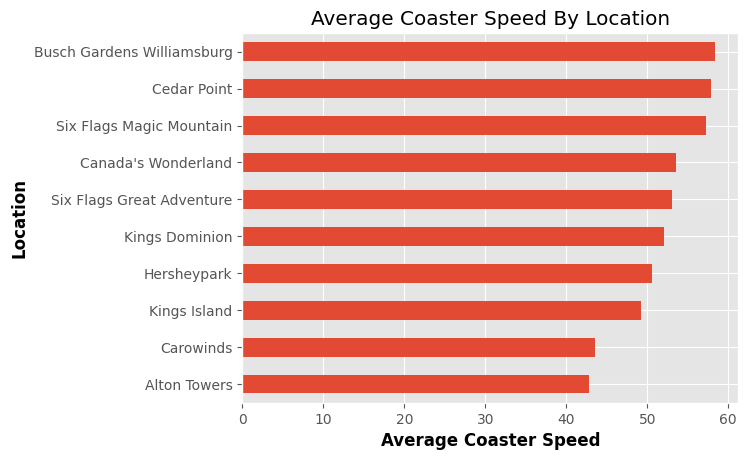

In [38]:
ax= df.query('Location != "Other"').groupby('Location')['Speed_mph'].agg(['mean','count']).query('count>=10')\
.sort_values('mean')['mean'].plot(kind='barh', title="Average Coaster Speed By Location" )
ax.set_xlabel("Average Coaster Speed",fontweight='bold',color='black')
ax.set_ylabel("Location",fontweight='bold',color='black')
plt.show()